## AIRS Simulation-Based UQ for Near-Surface Temperature

The AIRS simluation-based UQ pipeline produces ensembles of simulated true states and retrievals. These ensembles are used to define a joint distribution for the true near-surface air temperature (NSAT) $x_{NSAT}$ and the retrieved state $\hat{\mathbf{x}}_{AIRS}$. Specifically, a Gaussian mixture model (GMM) is used to represent the joint distribution

$$ \left[ \begin{array}{c} x_{NSAT} \\  \hat{\mathbf{x}}_{AIRS} \end{array} \right ] 
    \sim \mathrm{GMM} \left (  \boldsymbol{\pi}, \{ \boldsymbol{\mu}_k \}, \{ \boldsymbol{\Sigma}_k \}  \right )  $$
where each of the $k = 1, \ldots, K$ mixture components have mean vectors and covariance matrices partitioned as
$$  \boldsymbol{\mu}_k = \left [ \begin{array}{c} \mu_{NSAT,k} \\ \boldsymbol{\mu}_{AIRS,k}  \end{array} \right ] \equiv  \left [ \begin{array}{c} \mu_{B,k} \\ \boldsymbol{\mu}_{A,k}  \end{array} \right ] $$
$$  \boldsymbol{\Sigma}_k = \left [ \begin{array}{c c} \boldsymbol{\Sigma}_{BB,k} & \boldsymbol{\Sigma}_{BA,k} \\ \boldsymbol{\Sigma}_{AB,k} & \boldsymbol{\Sigma}_{AA,k}  \end{array} \right ]  $$

This specification allows the construction of the conditional distribution $ p(x_{NSAT}| \hat{\mathbf{x}}_{AIRS})$, which can be applied to operational AIRS retrievals. This distribution is a mixture of Gaussian conditionals,
$$ x_{NSAT}| \hat{\mathbf{x}}_{AIRS}
    \sim \mathrm{GMM} \left (  \boldsymbol{\pi}_{B|A}, \{ \mu_{B|A,k} \}, \{ \sigma^2_{B|A,k} \}  \right )  $$
Interrogating this model can be aided by introducing the latent mixture component indicator $c$. Then 
$$ \begin{align*}
 \pi_{B|A,k} & = Pr(c = k| \hat{\mathbf{x}}_{AIRS}) \\
  & = \frac{\phi(\hat{\mathbf{x}}_{AIRS}|  \boldsymbol{\mu}_{A,k},  \boldsymbol{\Sigma}_{AA,k} ) }{\sum_{k^{\prime}=1}^{K} \phi(\hat{\mathbf{x}}_{AIRS}|  \boldsymbol{\mu}_{A,k^{\prime}},  \boldsymbol{\Sigma}_{AA,k^{\prime}} )}
 \end{align*} $$
where $\phi$ is the multivariate Gaussian probability density function. The component-specific conditional means and (co)-variances follow the typical Gaussian conditional formulas,
$$  \mu_{B|A,k} = \mu_{B,k} + \boldsymbol{\Sigma}_{BA,k} \boldsymbol{\Sigma}_{AA,k}^{-1} \left ( \hat{\mathbf{x}}_{AIRS} - \boldsymbol{\mu}_{A,k} \right ) $$
$$ \sigma^2_{B|A,k} =  \boldsymbol{\Sigma}_{BB,k} - \boldsymbol{\Sigma}_{BA,k} \boldsymbol{\Sigma}_{AA,k}^{-1} \boldsymbol{\Sigma}_{AB,k} $$

***

### Conditional Moments

There are various options for summarizing the the conditional distribution $ p(x_{NSAT}| \hat{\mathbf{x}}_{AIRS})$. It is possible to compute moments analytically and/or draw samples from the distribution. In both cases the uncertainty due to the latent mixture component indicator $c$ is incorporated.

Both approaches make use of the joint distribution, 

$$ p(x_{NSAT}, c| \hat{\mathbf{x}}_{AIRS}) = p(x_{NSAT}|c, \hat{\mathbf{x}}_{AIRS}) \, p(c|\hat{\mathbf{x}}_{AIRS})  $$

**Analytic Calculation**

For the analytic calculation, the mean and variance can be computed using iterative formulas for integrating $p(x_{NSAT}, c| \hat{\mathbf{x}}_{AIRS})$ over the component indicator $c$:

$$ \begin{align*} \mu_{B|A} & = E (x_{NSAT}| \hat{\mathbf{x}}_{AIRS}) \\ & = E_c ( E (x_{NSAT}|c,\hat{\mathbf{x}}_{AIRS})) \\
    & = E_c (\mu_{B|A,k}) \\
    & = \sum_{k=1}^K \pi_{B|A,k}  \; \mu_{B|A,k} \end{align*} $$

$$ \begin{align*} \sigma^2_{B|A} & =  Var (x_{NSAT}| \hat{\mathbf{x}}_{AIRS}) \\ & = E_c ( Var (x_{NSAT}|c,\hat{\mathbf{x}}_{AIRS})) + Var_c  ( E (x_{NSAT}|c,\hat{\mathbf{x}}_{AIRS})) \\
    & = E_c (\sigma^2_{B|A,k}) + Var_c ( \mu_{B|A,k} ) \\
    & = \sum_{k=1}^K \pi_{B|A,k}  \; \sigma^2_{B|A,k} + 
    \sum_{k=1}^K \pi_{B|A,k} (  \mu_{B|A,k} -  \mu_{B|A})^2 \end{align*}  $$

The $c$ subscript indicates that the expectation or variance is taken over the distribution of the mixture component indicator, $p(c|\hat{\mathbf{x}}_{AIRS}) $

**Simulation**

For the simulation approach, samples form the joint distribution $p(x_{NSAT}, c| \hat{\mathbf{x}}_{AIRS})$ are drawn, and the margin  $ p(x_{NSAT}| \hat{\mathbf{x}}_{AIRS})$ can be extracted from these samples. Each sample is drawn with a hierarchical approach.

Repeat $i = 1, \ldots, M$ times 

1. Sample a mixture component indicator $c^{(i)}$ from a multinomial distribution with probabilities given by $\pi_{B|A,k} $
2. Sample a realization $x_{NSAT}^{(i)}$ from a (univariate) Gaussian distribution with mean $\mu_{B|A,k}$ and variance $ \sigma^2_{B|A,k}$

Monte Carlo estimates, $ \tilde{\mu}_{B|A}$ and $\tilde{\sigma}^2_{B|A}$, can be computed as the empirical mean and variance from these $M$ samples.

### Individual Sounding Example

The GMM parameter estimates for a template are saved to a NetCDF file. See the example, `PostGMM_SGP_MAM_21UTC.nc`

Several variables are stored, including the GMM parameters

* Mixture proportions $\boldsymbol{\pi}$: `mixture_proportion`
* Component true NSAT means $\mu_{B,k}$: `mean_true`
* Component retrieved state means $\boldsymbol{\mu}_{A,k}$: `mean_retrieved`
* Component true NSAT variances $\boldsymbol{\Sigma}_{AA,k}$: `varcov_true`
* Component retrieved state covariances $\boldsymbol{\Sigma}_{BB,k}$: `varcov_retrieved`
* Component cross-covariances $\boldsymbol{\Sigma}_{BA,k}$: `varcov_cross`

In [1]:
# Read in template GMM and AIRS dataset
import numpy
import numpy.ma as ma
from netCDF4 import Dataset
import gmm_support
import pandas

gmmfl = 'PostGMM_SGP_MAM_21UTC.nc'
ncgmm = Dataset(gmmfl)
mxprp = ncgmm.variables['mixture_proportion'][:]
nstmn = ncgmm.variables['mean_true'][:,:]
rtnms = ncgmm.variables['state_names_retrieved'][:]
ncgmm.close()

nmclps = rtnms.tolist()
strvrs = list(map(gmm_support.clean_byte_list,nmclps))
print(strvrs)

print(mxprp)
print(nstmn)



['NSTRtrv', 'TDif850', 'NCloud', 'CFrcMean', 'CFrcSD', 'NClr', 'NOvc', 'TempPC 1', 'TempPC 2', 'TempPC 3', 'TempPC 4']
[0.02301024 0.20159245 0.00093249 0.0102825  0.00846454 0.00386289
 0.00543866 0.10263137 0.00782882 0.01116066 0.15922218 0.05103152
 0.04673252 0.05812916 0.02192983 0.01624723 0.20840037 0.06310256]
[[288.35317532]
 [294.76385654]
 [286.8553402 ]
 [283.63667659]
 [299.42201136]
 [294.25142461]
 [301.96907466]
 [296.81156476]
 [298.53986111]
 [283.09362164]
 [297.76912099]
 [298.36422256]
 [281.04170953]
 [289.18698656]
 [297.87448033]
 [277.43721572]
 [294.6953599 ]
 [299.75341946]]


In [2]:
# Read in the CONUS daily summary file, extract sounding of interest
sdgidx = 856

pstdly = 'CONUS_AIRS_L2PostEst_20190317_MAM_21UTC.nc'
ncdly = Dataset(pstdly)
airsx = ncdly.variables['airs_x_index'][:]
airsy = ncdly.variables['airs_y_index'][:]
airsgrn = ncdly.variables['airs_granule'][:]
ncdly.close()

# Our dataset is index 1806
print(airsgrn[sdgidx])
print(airsy[sdgidx])
print(airsx[sdgidx])

205
41
28


In [3]:
# Construct single-sounding conditional GMM
import importlib
importlib.reload(gmm_support)

l2spfl = 'AIRS.2019.03.17.205.L2.RetSup_IR.v6.0.31.1.G19077142030.hdf'

sdgfrm = gmm_support.airs_nsat_sdg_gmm(gmmfl, l2spfl, airsy[sdgidx], airsx[sdgidx])
sdgfrm

PostGMM_SGP_MAM_21UTC.nc
Number TAir PCs: 4
(4,)
[ 285.55862427   -4.44485474    0.            0.            0.
    9.            0.         1030.38951362  221.46453671 1420.80027915
  190.3275002 ]
Computing f_y_c
Adjdens shape
(1, 18)
computing p_c_y
[[0.06514607650854162 0.0 8.491343086188046e-40 0.04575608935271029 0.0
  0.0 0.0 0.0 0.0 1.1541279951219946e-47 0.786405567690276 0.0 0.0 0.0
  0.002471110388815117 0.1002211560596569 0.0 0.0]]
(1, 18)
predicting E_X_Y
(11,)
(1,)
(11,)
(1, 18)
[284.53156362]
predicting Sigma_X_Y
   Component  CondProb  CompCondMean  CompCondVar
0         -1       1.0    284.531564    27.182878


,Component,CondProb,CompCondMean,CompCondVar
0,1,6.514608e-02,281.227488,16.466451
1,2,0.000000e+00,287.652531,14.349493
2,3,8.491343e-40,292.747796,5.058979
3,4,4.575609e-02,271.960500,12.299371
4,5,0.000000e+00,395.122449,2.790189
5,6,0.000000e+00,292.450967,5.185157
6,7,0.000000e+00,322.744068,3.633551
7,8,0.000000e+00,289.430082,11.215828
8,9,0.000000e+00,279.658738,6.834583
9,10,1.154128e-47,284.572822,7.042027


The resulting data frame provides the collection of single-sounding conditional GMM parameters for a single AIRS retrieval. These parameters can be used to produce a posterior density plot. In addition, mean and variance calculations can be made using the simulation and analytical approaches.

**Analytic Calculation**

In [4]:
# Analytical Overall Mean
cndmn = numpy.sum(sdgfrm['CondProb'] * sdgfrm['CompCondMean'])

strmn = '''Analytic mean calculation
Overall mean: %.6f
''' % (cndmn)
print(strmn)

# Between/Within
expvar = numpy.sum(sdgfrm['CondProb'] * sdgfrm['CompCondVar'])
varexp = numpy.sum(sdgfrm['CondProb'] * (sdgfrm['CompCondMean']-cndmn) * (sdgfrm['CompCondMean']-cndmn))

totvar = expvar + varexp

strvr = '''Analytic variance calculation
Within E(Var):     %.6f
Between Var(E):    %.6f
Total:             %.6f
''' % (expvar,varexp,totvar)

print(strvr)


Analytic mean calculation
Overall mean: 284.531564

Analytic variance calculation
Within E(Var):     12.253806
Between Var(E):    14.929072
Total:             27.182878



(81,)


Text(0.5, 1.0, 'NSAT Conditional Density')

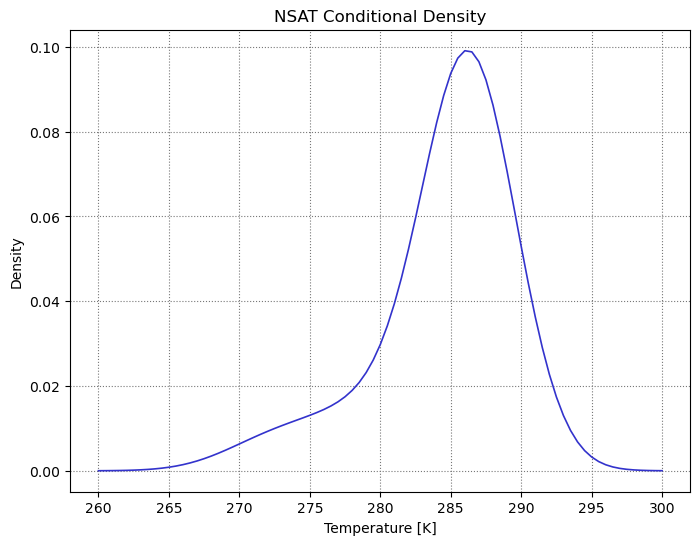

In [5]:
from scipy import stats
from numpy import random
import pylab
from matplotlib import pyplot, colors
import matplotlib.ticker as mticker

# Plot mixture density
tmpsq = numpy.arange(260,300.5,0.5)
ncmp = sdgfrm.shape[0]
dnsarr = numpy.zeros((ncmp,tmpsq.shape[0]),dtype=numpy.float32)
for k in range(ncmp):
    crsd = numpy.sqrt(sdgfrm['CompCondVar'].values[k])
    dnsarr[k,:] = sdgfrm['CondProb'].values[k] * stats.norm.pdf(tmpsq,loc=sdgfrm['CompCondMean'].values[k],scale=crsd) 
fldns = numpy.sum(dnsarr,axis=0)
print(fldns.shape)

%matplotlib inline
fig = pyplot.figure(figsize=(8,6))

p1 = pyplot.subplot(1,1,1)
pl1 = p1.plot(tmpsq,fldns,'-',linewidth=1.2,color='#3333CC')
p1.set_xlabel('Temperature [K]')
p1.set_ylabel('Density')
p1.xaxis.grid(color='#777777',linestyle='dotted')
p1.yaxis.grid(color='#777777',linestyle='dotted')
for lb in p1.xaxis.get_ticklabels():
    lb.set_fontsize(10)
for lb in p1.yaxis.get_ticklabels():
    lb.set_fontsize(10)
str1 = 'NSAT Conditional Density'
pyplot.title(str1,size=12)

**Monte Carlo Samples**

[ 318    0    0  262    0    0    0    0    0    0 3941    0    0    0
    7  472    0    0]
4.057887541319713
3.5070458651482634
3.3214650554877716
3.1631746823168694
4.37449939960037
5.247341251488436
284.4798067987816
5000
[0.0636 0.     0.     0.0524 0.     0.     0.     0.     0.     0.
 0.7882 0.     0.     0.     0.0014 0.0944 0.     0.    ]


Text(0.5, 1.0, 'NSAT Conditional Samples')

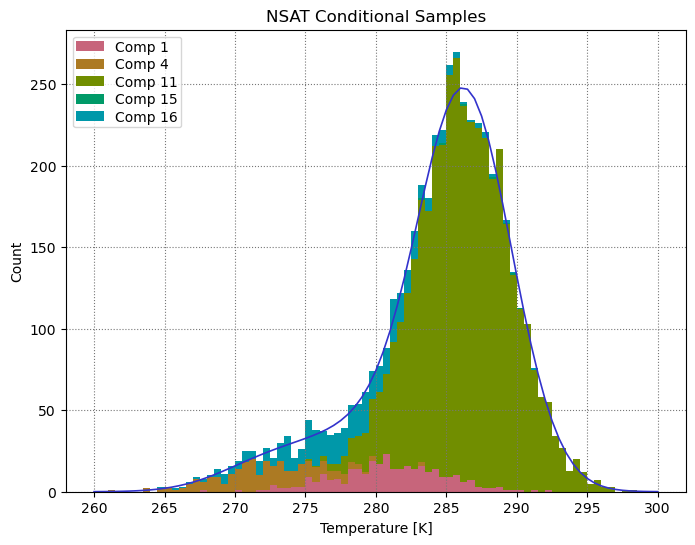

In [6]:
# Draw samples from the p(x|c) p(c) distribution

random.seed(422561)

nsmp = 5000
# Components
cmpidx = numpy.zeros((nsmp,),dtype=numpy.int16)
csmp = random.multinomial(nsmp,pvals=sdgfrm['CondProb'].values)
print(csmp)

tmpsmp = numpy.zeros((nsmp,),dtype=numpy.float64)
devsmp = numpy.zeros((nsmp,),dtype=numpy.float64)
cmsz = 0
for k in range(ncmp):
    if csmp[k] > 0:
        sdfn = cmsz + csmp[k]
        crsd = numpy.sqrt(sdgfrm['CompCondVar'].values[k])
        print(crsd)
        dtz = random.normal(loc=0.0, scale=crsd, size=csmp[k])
        dty = sdgfrm['CompCondMean'].values[k] + dtz
        
        tmpsmp[cmsz:sdfn] = dty[:]
        devsmp[cmsz:sdfn] = dtz[:]
        cmpidx[cmsz:sdfn] = k + 1
        cmsz = cmsz + csmp[k]
        
# Re-shuffle
ssq = numpy.arange(nsmp)
sqsmp = random.choice(ssq,size=nsmp,replace=False)
#cmpshf = cmpidx[sqsmp]
        
print(numpy.std(tmpsmp))
print(numpy.mean(tmpsmp))
print(cmsz)
print(csmp * 1.0/nsmp)

# Assemble into data frame
smpfrm = pandas.DataFrame({'MixComp': cmpidx[sqsmp], 'NSATSamp': tmpsmp[sqsmp], 'CompDev': devsmp[sqsmp]})

c7 = ["#C7657B","#AC7A23","#718E00","#009A68","#0098A9","#6881C9","#B865B7"]
c7a = [colors.colorConverter.to_rgba(c,alpha=0.4) \
       for c in c7]

%matplotlib inline
fig = pyplot.figure(figsize=(8,6))

p1 = pyplot.subplot(1,1,1)
cct = 0
dtlst = []
lglst = []
for k in range(ncmp):
    frmsb = smpfrm[smpfrm['MixComp'] == (k+1)]
    if frmsb.shape[0] > 0:
        dtlst.append(frmsb['NSATSamp'])
        nmcr = 'Comp %d' % (k+1)
        lglst.append(nmcr)
        cct = cct + 1
n, bins, patches = pyplot.hist(dtlst,tmpsq,color=c7[0:cct],label=lglst,density=False,stacked=True)
pl1 = p1.plot(tmpsq,fldns*nsmp*0.5,'-',linewidth=1.2,color='#3333CC')
p1.set_xlabel('Temperature [K]')
p1.set_ylabel('Count')
p1.xaxis.grid(color='#777777',linestyle='dotted')
p1.yaxis.grid(color='#777777',linestyle='dotted')
for lb in p1.xaxis.get_ticklabels():
    lb.set_fontsize(10)
for lb in p1.yaxis.get_ticklabels():
    lb.set_fontsize(10)
leg = pyplot.legend( loc = 'upper left',labelspacing=0.25,borderpad=0.25)
for t in leg.get_texts():
    t.set_fontsize(10)
str1 = 'NSAT Conditional Samples'
pyplot.title(str1,size=12)



The samples can provide a Monte Carlo estimate of the conditional mean and variance, including the within and between component contributions

In [7]:
smpgrp = smpfrm.groupby(['MixComp'])
smpsmry = smpgrp.apply(gmm_support.qsummary,grpvr='MixComp',vlvr='NSATSamp')
smpsmry['Prop'] = smpsmry['NSmp'] * 1.0 / nsmp
smpsmry

,,NSmp,Mean,Variance,Prop
MixComp,,,,,
1,0,318,280.988111,14.894591,0.0636
4,0,262,272.274989,12.377431,0.0524
11,0,3941,286.342673,11.023131,0.7882
15,0,7,287.410510,6.158500,0.0014
16,0,472,278.009363,20.777276,0.0944


In [8]:
# Overall Mean
ovrmn = numpy.mean(smpfrm['NSATSamp'])
ovrmn2 = numpy.sum(smpsmry['Prop'] * smpsmry['Mean'])

strmn = '''Monte Carlo mean estimates
Overall mean: %.6f
From groups:  %.6f
''' % (ovrmn,ovrmn2)
print(strmn)

# Between/Within
expvar = numpy.sum(smpsmry['Prop'] * smpsmry['Variance'])
varexp = numpy.sum(smpsmry['Prop'] * (smpsmry['Mean']-ovrmn) * (smpsmry['Mean']-ovrmn))

totvar = expvar + varexp
totvar2 = numpy.var(smpfrm['NSATSamp'])

strvr = '''Monte carlo variance estimates
Within E(Var):     %.6f
Between Var(E):    %.6f
Total:             %.6f

Empirical MC Var:  %.6f
''' % (expvar,varexp,totvar,totvar2)

print(strvr)


Monte Carlo mean estimates
Overall mean: 284.479807
From groups:  284.479807

Monte carlo variance estimates
Within E(Var):     12.254302
Between Var(E):    15.280288
Total:             27.534590

Empirical MC Var:  27.534590



### Daily Summary

The conditional GMM is applied to all AIRS soundings falling within each template (e.g. over CONUS for a season). Results for each sounding are summarized and stored in daily NetCDF files. See the example, `CONUS_AIRS_L2PostEst_20190317_MAM_21UTC.nc`

Identifying information from AIRS, such as sounding longitude, latitude, time, and granule are provided, along with some GMM summaries, including:

* Conditional (analytic) mean NSAT: `pred_post_mean`
* Conditional (analytic) variance: `pred_post_var`
* Conditional component probabilities $\boldsymbol{\pi}_{B|A}$: `pred_post_prob`
* The vector of AIRS retrieved quantities $\hat{x}_{AIRS}$: `airs_ret_covariate`
* Samples (nsmp=500) from the conditional distribution: `pred_post_prob`

The figure below summarizes the analytic conditional standard deviation versus the Monte Carlo result for all soundings for a selected day. 

Broadly speaking, the analytic and Monte Carlo estimates seem consistent. Note that some Monte Carlo error is expected, and it can be reduced with increased MC sample size.

Text(0.5, 1.0, 'Full CONUS NSAT Conditional Std Dev')

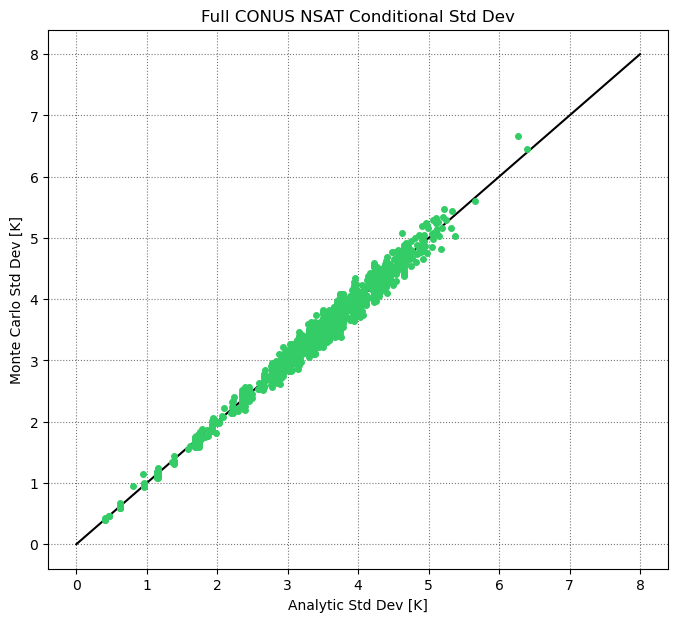

In [9]:
pstdly = 'CONUS_AIRS_L2PostEst_20190317_MAM_21UTC.nc'
ncdly = Dataset(pstdly)
pstmn = ncdly.variables['pred_post_mean'][:,0]
pstvr = ncdly.variables['pred_post_var'][:,0,0]
pstsmp = ncdly.variables['pred_post_samples'][:,:,0]
ncdly.close()

# Monte Carlo standard deviations
mcsd = numpy.std(pstsmp,axis=1)

# Analytic standard deviations
pstsd = numpy.sqrt(pstvr)

%matplotlib inline
fig = pyplot.figure(figsize=(8,7))

p1 = pyplot.subplot(1,1,1)
pl0 = p1.plot([0,8],[0,8],'k-')
pl1 = p1.plot(pstsd,mcsd,'o',ms=4,color='#33CC66')
p1.set_xlabel('Analytic Std Dev [K]')
p1.set_ylabel('Monte Carlo Std Dev [K]')
p1.xaxis.grid(color='#777777',linestyle='dotted')
p1.yaxis.grid(color='#777777',linestyle='dotted')
for lb in p1.xaxis.get_ticklabels():
    lb.set_fontsize(10)
for lb in p1.yaxis.get_ticklabels():
    lb.set_fontsize(10)
str1 = 'Full CONUS NSAT Conditional Std Dev'
pyplot.title(str1,size=12)

***

**Miscellaneous Setup**

In [10]:
# Read in the CONUS daily summary file, display MC versus analytical variances

pstdly = 'CONUS_AIRS_L2PostEst_20190317_MAM_21UTC.nc'
ncdly = Dataset(pstdly)
airsx = ncdly.variables['airs_x_index'][:]
airsy = ncdly.variables['airs_y_index'][:]
airsgrn = ncdly.variables['airs_granule'][:]
pstprb = ncdly.variables['pred_post_prob'][:,:]
rgn = ncdly.variables['region_indicator'][:]
pstmn = ncdly.variables['pred_post_mean'][:,0]
pstvr = ncdly.variables['pred_post_var'][:,0,0]
pstskw = ncdly.variables['pred_post_skew'][:,0]
ncdly.close()

# Our dataset is index 856
print(airsgrn[856])
print(airsy[856])
print(airsx[856])
print(pstprb[856,:])

205
41
28
[6.5146081e-02 0.0000000e+00 8.4918547e-40 4.5756329e-02 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 7.8640538e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.4711075e-03
 1.0022108e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


In [11]:
mxprb = numpy.amax(pstprb,axis=1)
print(mxprb.shape)

prbfrm = pandas.DataFrame({'AIRSXTrk': airsx, 'AIRSATrk': airsy, 'Granule': airsgrn, 'Region': rgn, \
                            'MaxPrb': mxprb, 'NSATMean': pstmn, 'NSATVar': pstvr, 'NSATSkew': pstskw})

(2169,)


In [12]:
prbsk = prbfrm[(prbfrm['NSATSkew'] <= -0.5) & (prbfrm['MaxPrb'] <= 0.9)]
prbsk

,AIRSXTrk,AIRSATrk,Granule,Region,MaxPrb,NSATMean,NSATVar,NSATSkew
2,16,36,205,1,0.563317,287.163177,21.852064,-0.589074
3,17,36,205,1,0.538841,286.672333,25.597147,-0.506449
10,18,37,205,1,0.890998,288.023621,13.411311,-0.796578
13,21,37,205,1,0.684487,288.182281,26.148209,-0.615148
25,14,38,205,1,0.736388,288.703033,16.059282,-0.666147
128,25,42,205,1,0.622930,286.579254,20.237762,-0.570594
143,12,43,205,1,0.893671,288.271118,10.944400,-0.528646
208,27,0,206,1,0.697654,285.616882,20.841675,-0.650254
238,28,1,206,1,0.682193,288.222107,24.140471,-0.600126
239,0,2,206,1,0.894824,294.874207,14.577770,-0.876480
